In [93]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

import sys

sys.path.append('../scripts')

In [94]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
from elements import *

import measurement as me

# Frequency Conversion using optomechanically induced transparency


### Defining the 3 mode system

In [96]:
omega_cav1 = 5e9*np.pi*2
kappa_01 = 0.3e6*np.pi*2
kappa_ex1 = 0.4e6*np.pi*2

omega_cav2 = 6e9*np.pi*2
kappa_02 = 0.3e6*np.pi*2
kappa_ex2 = 0.4e6*np.pi*2


omega_m = 5e6*np.pi*2
gamma_m = 100*np.pi*2

g_01 = 200*np.pi*2
g_02= 200*np.pi*2


P_in1 = 8e-10
Delta1 = -omega_m
omega_cont1 = omega_cav1 + Delta1
T_cont1 = 2
bath_temp1 = 10e-3

P_in2 = 8e-10
Delta2 = -omega_m
omega_cont2 = omega_cav2 + Delta2
T_cont2 = 2
bath_temp2 = 10e-3

from DCnonlinearities import optomechanics

omdir1 = optomechanics(P_in1, kappa_01, kappa_ex1, omega_cav1, omega_cont1, omega_m, g_01)
g1= omdir1['g']
omega_cav1 = omdir1['omega_c']

omdir2 = optomechanics(P_in2, kappa_02, kappa_ex2, omega_cav2, omega_cont2, omega_m, g_02)
g2= omdir2['g']
omega_cav2 = omdir2['omega_c']



a1 = Mode('a1', omega_cav1)
a2 = Mode('a2', omega_cav2)
b = Mode('b', omega_m)

a_cont1 = Input('ex', a1, kappa_ex1, kind = 'drive', omega_drive = omega_cont1, bath_temp = T_cont1)
a_in01 = Input('0', a1, kappa_01, kind = 'bath', bath_temp = bath_temp1)

a_cont2 = Input('ex', a2, kappa_ex2, kind = 'drive', omega_drive = omega_cont2, bath_temp = T_cont2)
a_in02 = Input('0', a2, kappa_02, kind = 'bath', bath_temp = bath_temp2)

b_in0 = Input('0', b, gamma_m, kind = 'bath', bath_temp=10e-3)

g_a1b = Coupling(a1, b, g1 * np.array([1,0,1,0]))
g_a2b = Coupling(a2, b, g2 * np.array([1,0,0,0]))

sys_om = System([a1, a2, b], [a_in01, a_in02, b_in0, a_cont1, a_cont2], [g_a1b, g_a2b])

print ('Cooperativities\n C1: ',4*g1**2/a1.kappa/gamma_m,'C2:',4*g2**2/a2.kappa/gamma_m)

Cooperativities
 C1:  1405.530153827928 C2: 1170.3111044914922


<IPython.core.display.Javascript object>


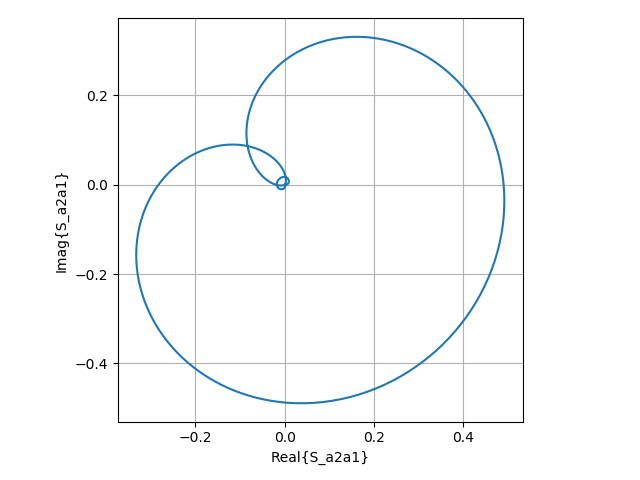

<IPython.core.display.Javascript object>


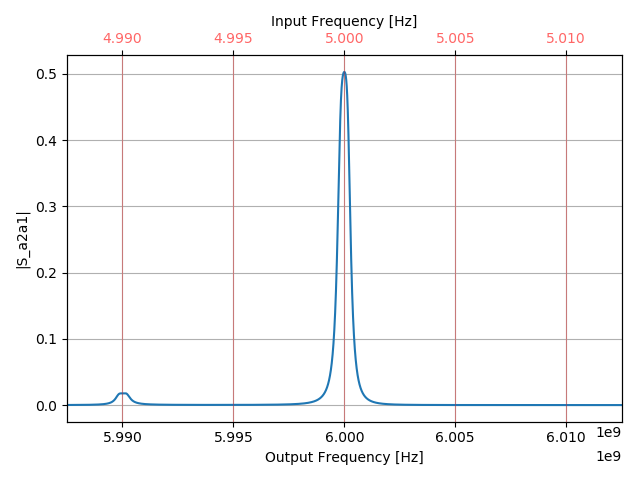

<IPython.core.display.Javascript object>


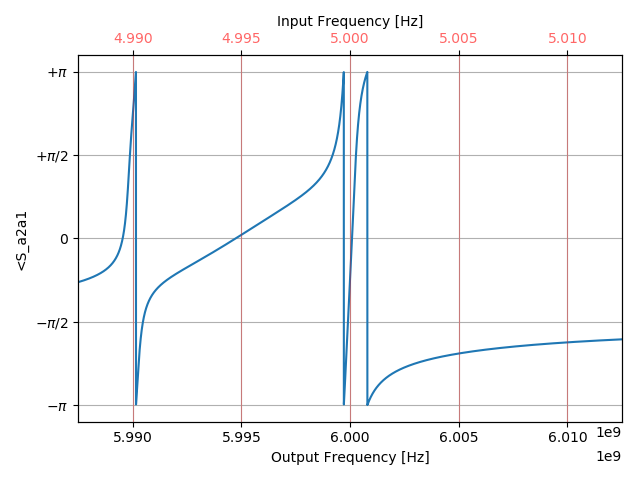

In [97]:
a_outex1 = Output(sys_om, a_cont1)
a_outex2 = Output(sys_om, a_cont2)

omegas = np.linspace(omega_cav1 - 2.5* omega_m, omega_cav1 +  2.5 * omega_m, 10000)
omegas_new, A = me.linear_response(omegas, sys_om, a_outex2, a_cont1, plot = True)